# Exercício 9

* Leia o dataset anexado nesta aula e armazene em uma variável;

* Mostre as 3 primeiras linhas do dataset;

* Mostre as duas últimas linhas do dataset;

* Mostre o shape do dataset;

* Obtenha informações das colunas com o método info();

* Mostre estatísticas descritivas do dataset;

* Mostre o tipo de dado de cada coluna;

* Mostre a existência ou não de missing data.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# lendo o dataset e armazenando na variável 'df'

df = pd.read_csv('/content/dataset.csv')

In [4]:
df

,Nome,Idade,Rating,Renda
0,Sato,18,3.66,D
1,Suzuki,20,3.51,D
2,Takahashi,26,9.73,A
3,Tanaka,25,2.47,D
4,Watanabe,26,8.07,A
...,...,...,...,...
95,Matsuo,21,6.42,B
96,Kikuchi,18,7.91,A
97,Nomura,28,2.86,D
98,Arai,28,8.98,A


In [5]:
# mostrando as 3 primeiras linhas do dataset

df.head(3)

,Nome,Idade,Rating,Renda
0,Sato,18,3.66,D
1,Suzuki,20,3.51,D
2,Takahashi,26,9.73,A


In [7]:
# mostrando as duas últimas linhas do dataset

df.tail(2)

,Nome,Idade,Rating,Renda
98,Arai,28,8.98,A
99,Watanabe,29,4.81,B


In [8]:
# mostrando o shape do dataset

df.shape

(100, 4)

In [10]:
# infos do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nome    100 non-null    object 
 1   Idade   100 non-null    int64  
 2   Rating  100 non-null    float64
 3   Renda   100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [11]:
# estatísticas descritivas

df.describe()

,Idade,Rating
count,100.000000,100.000000
mean,23.400000,5.625700
std,4.042701,2.601318
min,17.000000,1.150000
25%,20.000000,3.487500
50%,24.000000,5.890000
75%,27.250000,7.837500
max,29.000000,9.990000


In [12]:
# estatísticas descritivas de todas as colunas

df.describe(include = 'all')

,Nome,Idade,Rating,Renda
count,100,100.000000,100.000000,100
unique,99,NaN,NaN,4
top,Watanabe,NaN,NaN,A
freq,2,NaN,NaN,36
mean,NaN,23.400000,5.625700,NaN
std,NaN,4.042701,2.601318,NaN
min,NaN,17.000000,1.150000,NaN
25%,NaN,20.000000,3.487500,NaN
50%,NaN,24.000000,5.890000,NaN
75%,NaN,27.250000,7.837500,NaN


In [13]:
# tipo de dados presentes em cada coluna

df.dtypes

Nome       object
Idade       int64
Rating    float64
Renda      object
dtype: object

In [15]:
# mostrando a existência ou não de missing data

df.isnull().sum()

Nome      0
Idade     0
Rating    0
Renda     0
dtype: int64

# Exercício 10

* Obtenha estatísticas descritivas da idade dos clientes (média, variância, desvio padrão, moda, mediana);

* Qual a correlação entre a idade e o rating?

* Qual a covariância entre a idade e o rating?

* Mostre as classes de renda do dataset.

In [25]:
# estatísticas descritivas da idade dos clientes

metricas = [np.mean, np.var, np.std, np.median]
group_age = df['Idade']
print(group_age.agg(metricas),'\n')
print(f'Moda:{group_age.mode()[0]}')

mean      23.400000
var       16.343434
std        4.042701
median    24.000000
Name: Idade, dtype: float64 

Moda:28


In [28]:
# correlação entre idade e rating

df[['Idade', 'Rating']].corr()

,Idade,Rating
Idade,1.00000,-0.00993
Rating,-0.00993,1.00000


Portanto, avaliando a matriz de correlação acima, temos que a correlação entre idade e rating é -0.00993. Ou seja, a correlação entre estas duas variáveis é muito baixa, o que indica fortemente que o valor de uma em nada interfere no valor da outra.

In [29]:
# covariância entre idade e rating

colunas = ['Idade', 'Rating']
df[colunas].cov()

,Idade,Rating
Idade,16.343434,-0.104424
Rating,-0.104424,6.766853


Portanto, avaliando a matriz de covariância acima, temos que a covariância entre idade e rating é -0.104424.

In [33]:
# classes de renda do dataset

df['Renda'].value_counts()

A    36
B    31
D    22
E    11
Name: Renda, dtype: int64

# Exercício 11

Relações entre as variáveis e visualização

* Calcule a matriz de correlação e covariância;
* Crie uma nova coluna para a Renda, em escala numérica. A escala varia entre 1 e 4 (E:1,D:2,B:3,A:4), quanto maior o número, maior o nível de renda do cliente;
* Calcule a correlação entre o Rating e a Renda em escala numérica.

In [34]:
# matriz de correlação

df[colunas].corr()

,Idade,Rating
Idade,1.00000,-0.00993
Rating,-0.00993,1.00000


In [35]:
# matriz de covariância

df[colunas].cov()

,Idade,Rating
Idade,16.343434,-0.104424
Rating,-0.104424,6.766853


In [41]:
# nova coluna de renda

def escala_num(rating):
  if rating == 'E':
    return 1
  elif rating == 'D':
    return 2
  elif rating == 'B':
    return 3
  else:
    return 4

df['RendaNum'] = df['Renda'].apply(escala_num)

In [42]:
df

,Nome,Idade,Rating,Renda,RendaNum
0,Sato,18,3.66,D,2
1,Suzuki,20,3.51,D,2
2,Takahashi,26,9.73,A,4
3,Tanaka,25,2.47,D,2
4,Watanabe,26,8.07,A,4
...,...,...,...,...,...
95,Matsuo,21,6.42,B,3
96,Kikuchi,18,7.91,A,4
97,Nomura,28,2.86,D,2
98,Arai,28,8.98,A,4


In [43]:
# correlação entre Rating e Renda

df['Rating'].corr(df['RendaNum'])

0.9521213336056304

# Exercício 12

Visualizando a distribuição dos dados

* Gere um histograma para a coluna idade;

* Gere um boxplot para as colunas Idade e Rating.

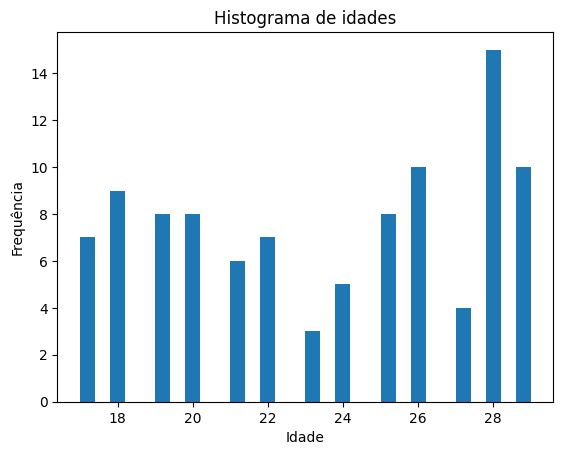

In [50]:
df['Idade'].plot(kind = 'hist', bins = 30)
plt.title('Histograma de idades')
plt.xlabel('Idade')
plt.ylabel('Frequência');

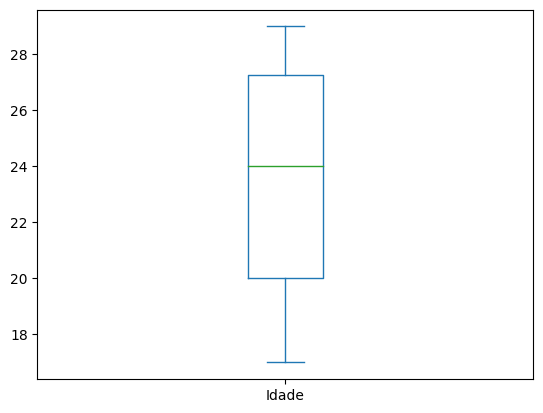

In [53]:
# boxplot de Idade

df['Idade'].plot(kind = 'box');

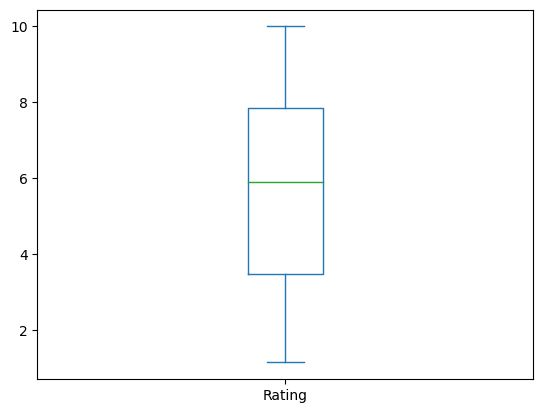

In [55]:
# boxplot de Rating

df['Rating'].plot(kind = 'box');

# Exercício 13
Consultas

* Filtre os clientes com idade maior ou igual a 28 anos;

* Filtre os clientes com renda A;

* Filtre os clientes com rating maior que 5.


In [56]:
# cliente com idade maior ou igual a 28 anos

df[df['Idade']>=28]

,Nome,Idade,Rating,Renda,RendaNum
17,Kimura,28,1.29,E,1
19,Shimizu,28,6.15,B,3
24,Hashimoto,29,4.57,B,3
29,Ogawa,28,6.07,B,3
32,Goto,28,8.30,A,4
35,Murakami,29,7.43,A,4
47,Matsuda,28,9.77,A,4
49,Nakano,29,8.97,A,4
51,Ono,29,1.50,E,1
53,Takeuchi,28,7.45,A,4


In [57]:
# clientes com Renda 'A'

df[df['Renda'] == 'A']

,Nome,Idade,Rating,Renda,RendaNum
2,Takahashi,26,9.73,A,4
4,Watanabe,26,8.07,A,4
5,Ito,25,7.25,A,4
9,Saito,21,8.63,A,4
10,Kato,18,9.34,A,4
11,Yoshida,24,7.83,A,4
12,Yamada,20,9.14,A,4
13,Sasaki,24,7.45,A,4
14,Yamaguchi,18,7.35,A,4
22,Ikeda,19,8.30,A,4


In [58]:
# clientes com rating maior que 5

df[df['Rating']>5]

,Nome,Idade,Rating,Renda,RendaNum
2,Takahashi,26,9.73,A,4
4,Watanabe,26,8.07,A,4
5,Ito,25,7.25,A,4
6,Yamamoto,19,6.53,B,3
7,Nakamura,21,6.34,B,3
9,Saito,21,8.63,A,4
10,Kato,18,9.34,A,4
11,Yoshida,24,7.83,A,4
12,Yamada,20,9.14,A,4
13,Sasaki,24,7.45,A,4
